In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
citydata = "data/city_data.csv"
ridedata = "data/ride_data.csv"

# Read the City and Ride Data
cdata = pd.read_csv(citydata)
rdata = pd.read_csv(ridedata)
# Combine the data into a single dataset
data = pd.merge(rdata, cdata, on='city', how='left')


# Create separate dataframes for the 3 plots
udata = data.loc[data['type'] == 'Urban']
sdata = data.loc[data['type'] == 'Suburban']
rdata = data.loc[data['type'] == 'Rural']

## Bubble Plot of Ride Sharing Data

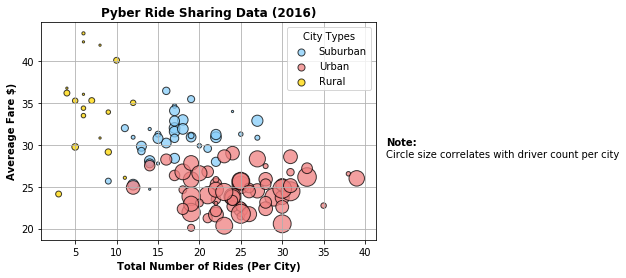

In [17]:
# Obtain the x and y coordinates for each of the three city types
sx = sdata.groupby(['city']).count()
sy = sdata.groupby(['city']).mean()
ux = udata.groupby(['city']).count()
uy = udata.groupby(['city']).mean()
rx = rdata.groupby(['city']).count()
ry = rdata.groupby(['city']).mean()


# Build the scatter plots for each city types
plt.scatter(sx.fare,sy.fare, s=sy['driver_count']*5, alpha=0.75, c='lightskyblue', edgecolors='black')
plt.scatter(ux.fare,uy.fare, s=uy['driver_count']*5, alpha=0.75, c='lightcoral', edgecolors='black')
plt.scatter(rx.fare,ry.fare, s=ry['driver_count']*5, alpha=0.75, c='gold', edgecolors='black')

# Incorporate the other graph properties
plt.grid(True)

# Create a legend
lgnd = plt.legend(['Suburban', 'Urban', 'Rural'], title='City Types', scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.xlabel('Total Number of Rides (Per City)', weight='semibold')
plt.ylabel('Avereage Fare $)', weight='semibold')
plt.title('Pyber Ride Sharing Data (2016)', weight = 'bold')
plt.text(42.5, 30, "Note:", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(42.5, 28.5, "Circle size correlates with driver count per city", horizontalalignment='left', size='medium', color='black')        
# Save Figure
plt.savefig('Bubble.png')
plt.show()

## Total Fares by City Type

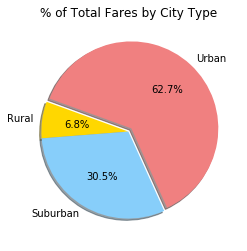

In [3]:
# Calculate Type Percents
fare = data.groupby(['type']).sum()
fare['Percent'] = round((fare['fare']/ fare['fare'].sum())*100, 1)
exp = (0, 0, 0.05)
colors = ['gold', 'lightskyblue', 'lightcoral']
# Build Pie Chart
plt.pie(fare.Percent, explode=exp, labels=fare.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('Pie1.png')
plt.show()

## Total Rides by City Type

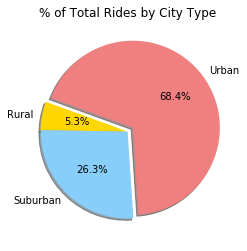

In [4]:
# Calculate Ride Percents
fare = data.groupby(['type']).nunique()
fare['Percent'] = round((fare['ride_id']/ fare['ride_id'].sum())*100, 1)
exp = (0, 0, 0.075)
colors = ['gold', 'lightskyblue', 'lightcoral']
# Build Pie Chart
plt.pie(fare.Percent, explode=exp, labels=fare.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('Pie2.png')
plt.show()

## Total Drivers by City Type

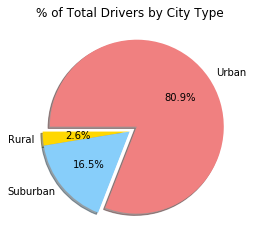

In [5]:
# Calculate Driver Percents
fare = cdata.groupby(['type']).sum()
fare['Percent'] = round((fare['driver_count']/ fare['driver_count'].sum())*100, 1)
exp = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
# Build Pie Chart
plt.pie(fare.Percent, explode=exp, labels=fare.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig('Pie3.png')
plt.show()